# Importing Library and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('South_Tangerang_House_Price.csv', encoding='latin1')
df.head()

,nav-link href,listing-location,price,bed,bath,listing-floorarea,listing-floorarea 2
0,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","6,9 M",5.0,5.0,420 m²,Rp 20.720.721 per m²
1,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","4,5 M",3.0,3.0,190 m²,Rp 12.747.875 per m²
2,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,95 M",3.0,3.0,132 m²,Rp 30.859.375 per m²
3,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,3 M",4.0,3.0,220 m²,Rp 18.333.333 per m²
4,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,5 M",3.0,2.0,180 m²,Rp 27.777.778 per m²


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29420 entries, 0 to 29419
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   nav-link href        29420 non-null  object 
 1   listing-location     29420 non-null  object 
 2   price                29420 non-null  object 
 3   bed                  29282 non-null  float64
 4   bath                 29215 non-null  float64
 5   listing-floorarea    29420 non-null  object 
 6   listing-floorarea 2  29383 non-null  object 
dtypes: float64(2), object(5)
memory usage: 1.6+ MB


In [4]:
df = df.drop(columns='nav-link href')
df

,listing-location,price,bed,bath,listing-floorarea,listing-floorarea 2
0,"Gading Serpong, Tangerang Selatan, Banten","6,9 M",5.0,5.0,420 m²,Rp 20.720.721 per m²
1,"Gading Serpong, Tangerang Selatan, Banten","4,5 M",3.0,3.0,190 m²,Rp 12.747.875 per m²
2,"Gading Serpong, Tangerang Selatan, Banten","3,95 M",3.0,3.0,132 m²,Rp 30.859.375 per m²
3,"Gading Serpong, Tangerang Selatan, Banten","3,3 M",4.0,3.0,220 m²,Rp 18.333.333 per m²
4,"Gading Serpong, Tangerang Selatan, Banten","3,5 M",3.0,2.0,180 m²,Rp 27.777.778 per m²
...,...,...,...,...,...,...
29415,"Bintaro, Tangerang Selatan, Banten","3,3 M",3.0,3.0,300 m²,Rp 21.710.526 per m²
29416,"Bintaro, Tangerang Selatan, Banten",4 M,8.0,4.0,330 m²,Rp 36.363.636 per m²
29417,"Bintaro, Tangerang Selatan, Banten","2,2 M",3.0,2.0,160 m²,Rp 18.333.333 per m²
29418,"Bintaro, Tangerang Selatan, Banten","1,95 M",3.0,2.0,120 m²,Rp 21.666.667 per m²


In [5]:
df = df.rename(columns={'listing-location' : 'Location', 'price' : 'Price', 'bed' : 'Bedroom', 'bath' : 'Bathroom', 
                        'listing-floorarea' : 'Floor_Area(m2)', 'listing-floorarea 2' : 'Floor_Area_Price'})

# Data Cleaning & Transform

**Dropping All The Null Values**

In [6]:
df.isna().sum()

Location              0
Price                 0
Bedroom             138
Bathroom            205
Floor_Area(m2)        0
Floor_Area_Price     37
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df.shape

(29180, 6)

**1. Location**

**1.1** Fixing Region

In [9]:
## I notice that the Location isn't in the same format. It Looks like Region, City, Province.
## But in the middle of data there are some rows that contain the street name, etc.
## So Before drop the duplicates, i want to fix it first

df['Location'].str.rsplit(',', n=2, expand=True)

,0,1,2
0,Gading Serpong,Tangerang Selatan,Banten
1,Gading Serpong,Tangerang Selatan,Banten
2,Gading Serpong,Tangerang Selatan,Banten
3,Gading Serpong,Tangerang Selatan,Banten
4,Gading Serpong,Tangerang Selatan,Banten
...,...,...,...
29415,Bintaro,Tangerang Selatan,Banten
29416,Bintaro,Tangerang Selatan,Banten
29417,Bintaro,Tangerang Selatan,Banten
29418,Bintaro,Tangerang Selatan,Banten


In [10]:
df['Region'] = df['Location'].str.rsplit(',', 2).str[0]
df['City'] = df['Location'].str.rsplit(',', 2).str[1]
df['Province'] = df['Location'].str.rsplit(',', 2).str[2]

In [11]:
df.head()

,Location,Price,Bedroom,Bathroom,Floor_Area(m2),Floor_Area_Price,Region,City,Province
0,"Gading Serpong, Tangerang Selatan, Banten","6,9 M",5.0,5.0,420 m²,Rp 20.720.721 per m²,Gading Serpong,Tangerang Selatan,Banten
1,"Gading Serpong, Tangerang Selatan, Banten","4,5 M",3.0,3.0,190 m²,Rp 12.747.875 per m²,Gading Serpong,Tangerang Selatan,Banten
2,"Gading Serpong, Tangerang Selatan, Banten","3,95 M",3.0,3.0,132 m²,Rp 30.859.375 per m²,Gading Serpong,Tangerang Selatan,Banten
3,"Gading Serpong, Tangerang Selatan, Banten","3,3 M",4.0,3.0,220 m²,Rp 18.333.333 per m²,Gading Serpong,Tangerang Selatan,Banten
4,"Gading Serpong, Tangerang Selatan, Banten","3,5 M",3.0,2.0,180 m²,Rp 27.777.778 per m²,Gading Serpong,Tangerang Selatan,Banten


In [12]:
df['Region'].unique()

## You can see the result. It Should Be just the Region like 'Bintaro', 'Gading Serpong', etc
## But there are some street name include in the location

array(['Gading Serpong', 'BSD', 'Jalan cempaka, Bintaro', ...,
       'Jl. Gardenia , Paku Jaya, Bintaro',
       'Ciputat Cinangka Bojongsari Pondok Cabe Depok, Ciputat Timur',
       'Cluster Mozart, Jl. Mozart Selatan 2, Banten 15334, BSD'],
      dtype=object)

In [13]:
region_fix = df['Region'].str.rsplit(',', n=0, expand=True)
region_fix

,0,1,2,3,4,5
0,Gading Serpong,None,None,None,None,None
1,Gading Serpong,None,None,None,None,None
2,Gading Serpong,None,None,None,None,None
3,Gading Serpong,None,None,None,None,None
4,Gading Serpong,None,None,None,None,None
...,...,...,...,...,...,...
29415,Bintaro,None,None,None,None,None
29416,Bintaro,None,None,None,None,None
29417,Bintaro,None,None,None,None,None
29418,Bintaro,None,None,None,None,None


In [14]:
region_fix = region_fix.fillna(method = 'pad', axis=1)

In [15]:
region_fix[5].unique()

## There are 'BSD' and 'Bsd' which is the same

array(['Gading Serpong', 'BSD', ' Bintaro', 'Alam Sutera',
       ' Gading Serpong', 'Bintaro', 'Serpong', ' Serpong Utara', ' BSD',
       ' Pamulang', ' Serpong', ' Pondok Aren', 'Ciputat Timur',
       'Ciputat', ' Ciputat', ' Ciputat Timur', 'Serpong Utara',
       'Pamulang', 'Pondok Aren', ' Alam Sutera', ' Ciledug', ' Setu',
       'Setu', ' Pagedangan', ' Cinere', ' Bsd', ' Serua', ' Larangan'],
      dtype=object)

In [16]:
region_fix[5] = region_fix[5].str.replace('Bsd', 'BSD')

In [17]:
df['Region'] = region_fix[5]

**1.2** Remove Left Space

I notice that region, city and province have left space.
So i need to fix that

In [18]:
df['Region'] = df['Region'].str.lstrip()
df['City'] = df['City'].str.lstrip()
df['Province'] = df['Province'].str.lstrip()

In [19]:
df['Region'].unique()

array(['Gading Serpong', 'BSD', 'Bintaro', 'Alam Sutera', 'Serpong',
       'Serpong Utara', 'Pamulang', 'Pondok Aren', 'Ciputat Timur',
       'Ciputat', 'Ciledug', 'Setu', 'Pagedangan', 'Cinere', 'Serua',
       'Larangan'], dtype=object)

In [20]:
df['City'].unique()

array(['Tangerang Selatan'], dtype=object)

In [21]:
df['Province'].unique()

array(['Banten'], dtype=object)

**2. Price**

In [22]:
## The Price in Indonesia Rupiah (IDR), but the function can't convert Indonesia Unit
## So we need to change it into universal unit format

df['Price'] = df['Price'].str.replace(' M', 'B')
df['Price'] = df['Price'].str.replace(' jt', 'M')
df['Price'] = df['Price'].str.replace(' rb', 'K')
df['Price'] = df['Price'].str.replace(',', '.')

In [23]:
df['Price'] = df['Price'].replace({'B':'*1e9', 'M':'*1e6', 'K':'*1e3'}, regex=True).map(pd.eval).astype('int64')

In [24]:
df['Price']

0        6900000000
1        4500000000
2        3950000000
3        3300000000
4        3500000000
            ...    
29415    3300000000
29416    4000000000
29417    2200000000
29418    1950000000
29419    5500000000
Name: Price, Length: 29180, dtype: int64

**3. Floor Area**

In [25]:
df['Floor_Area(m2)'] = df['Floor_Area(m2)'].str.replace('m²','')

**4. Floor Area Price**

In [26]:
df['Floor_Area_Price'] = df['Floor_Area_Price'].str.replace('m²','')
df['Floor_Area_Price'] = df['Floor_Area_Price'].str.replace('per','')
df['Floor_Area_Price'] = df['Floor_Area_Price'].str.replace('Rp','')
df['Floor_Area_Price'] = df['Floor_Area_Price'].str.replace('.','')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4404\1627368446.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Floor_Area_Price'] = df['Floor_Area_Price'].str.replace('.','')


In [27]:
df['Floor_Area_Price']

0         20720721  
1         12747875  
2         30859375  
3         18333333  
4         27777778  
            ...     
29415     21710526  
29416     36363636  
29417     18333333  
29418     21666667  
29419     30555556  
Name: Floor_Area_Price, Length: 29180, dtype: object

**5. Rearrange The Columns**

In [28]:
df

,Location,Price,Bedroom,Bathroom,Floor_Area(m2),Floor_Area_Price,Region,City,Province
0,"Gading Serpong, Tangerang Selatan, Banten",6900000000,5.0,5.0,420,20720721,Gading Serpong,Tangerang Selatan,Banten
1,"Gading Serpong, Tangerang Selatan, Banten",4500000000,3.0,3.0,190,12747875,Gading Serpong,Tangerang Selatan,Banten
2,"Gading Serpong, Tangerang Selatan, Banten",3950000000,3.0,3.0,132,30859375,Gading Serpong,Tangerang Selatan,Banten
3,"Gading Serpong, Tangerang Selatan, Banten",3300000000,4.0,3.0,220,18333333,Gading Serpong,Tangerang Selatan,Banten
4,"Gading Serpong, Tangerang Selatan, Banten",3500000000,3.0,2.0,180,27777778,Gading Serpong,Tangerang Selatan,Banten
...,...,...,...,...,...,...,...,...,...
29415,"Bintaro, Tangerang Selatan, Banten",3300000000,3.0,3.0,300,21710526,Bintaro,Tangerang Selatan,Banten
29416,"Bintaro, Tangerang Selatan, Banten",4000000000,8.0,4.0,330,36363636,Bintaro,Tangerang Selatan,Banten
29417,"Bintaro, Tangerang Selatan, Banten",2200000000,3.0,2.0,160,18333333,Bintaro,Tangerang Selatan,Banten
29418,"Bintaro, Tangerang Selatan, Banten",1950000000,3.0,2.0,120,21666667,Bintaro,Tangerang Selatan,Banten


In [29]:
df = df.drop(columns={'Location'})

In [30]:
cols = df.columns.tolist()
cols

['Price',
 'Bedroom',
 'Bathroom',
 'Floor_Area(m2)',
 'Floor_Area_Price',
 'Region',
 'City',
 'Province']

In [31]:
cols = [cols[-3]]+ [cols[-2]] + [cols[-1]] + [cols[1]] + [cols[2]] + [cols[3]] + [cols[0]] + [cols[4]]

In [32]:
df = df[cols]
df

,Region,City,Province,Bedroom,Bathroom,Floor_Area(m2),Price,Floor_Area_Price
0,Gading Serpong,Tangerang Selatan,Banten,5.0,5.0,420,6900000000,20720721
1,Gading Serpong,Tangerang Selatan,Banten,3.0,3.0,190,4500000000,12747875
2,Gading Serpong,Tangerang Selatan,Banten,3.0,3.0,132,3950000000,30859375
3,Gading Serpong,Tangerang Selatan,Banten,4.0,3.0,220,3300000000,18333333
4,Gading Serpong,Tangerang Selatan,Banten,3.0,2.0,180,3500000000,27777778
...,...,...,...,...,...,...,...,...
29415,Bintaro,Tangerang Selatan,Banten,3.0,3.0,300,3300000000,21710526
29416,Bintaro,Tangerang Selatan,Banten,8.0,4.0,330,4000000000,36363636
29417,Bintaro,Tangerang Selatan,Banten,3.0,2.0,160,2200000000,18333333
29418,Bintaro,Tangerang Selatan,Banten,3.0,2.0,120,1950000000,21666667


**6. Drop Duplicates**

In [33]:
df = df.drop_duplicates()

In [34]:
df.shape

(17446, 8)

**7. Check Data Types**

In [35]:
df.dtypes

Region               object
City                 object
Province             object
Bedroom             float64
Bathroom            float64
Floor_Area(m2)       object
Price                 int64
Floor_Area_Price     object
dtype: object

In [36]:
df['Floor_Area(m2)'] = df['Floor_Area(m2)'].astype('int64')
df['Floor_Area_Price'] = df['Floor_Area_Price'].astype('int64')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4404\4139155178.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Floor_Area(m2)'] = df['Floor_Area(m2)'].astype('int64')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_4404\4139155178.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Floor_Area_Price'] = df['Floor_Area_Price'].astype('int64')


# EDA

## Detect & Remove Outliers

In [37]:
df.describe().astype('int64')

,Bedroom,Bathroom,Floor_Area(m2),Price,Floor_Area_Price
count,17446,17446,17446,17446,17446
mean,3,3,224,3673744521,38133908
std,1,1,3202,8243146129,621857320
min,1,1,1,1,0
25%,3,2,83,1387025000,13000000
50%,4,3,140,2400000000,18061391
75%,4,4,240,4300000000,23895016
max,10,10,400000,850000000000,29375000000


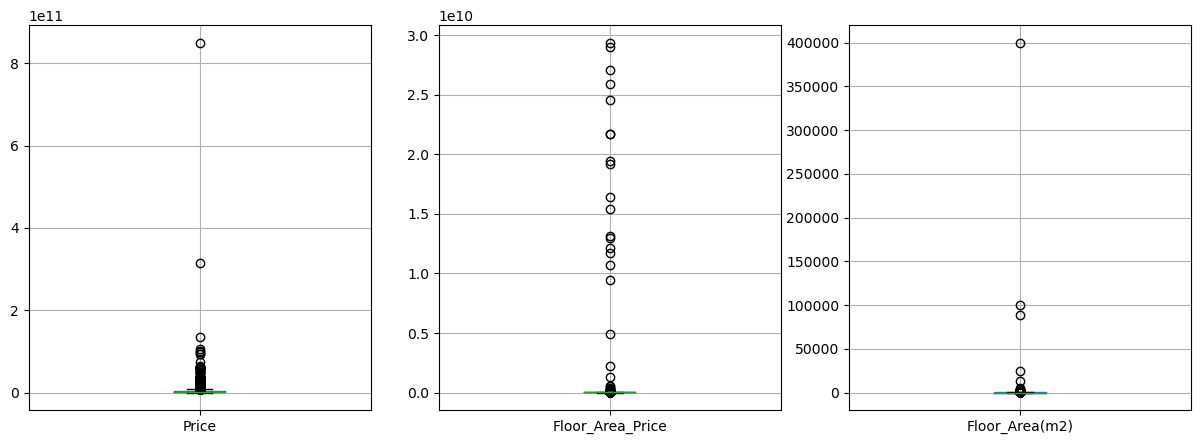

In [38]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
df.boxplot(column=['Price'])

plt.subplot(1,3,2)
df.boxplot(column=['Floor_Area_Price']) 

plt.subplot(1,3,3)
df.boxplot(column=['Floor_Area(m2)']) 

plt.show()

## I found that there are some 'unusual' value on Price, Floor Area Price, and also Floor_Area(m2)
## Like the price is 0, 1 and the floor area only 1 m2
## Since it's not normally distributed, i'm using percentile
## I decide to remove the outlier with 1% and 99%
## Especially for the Floor Area, i'm just going drop the bottom with percentile
## And for the highest floor area, i'm dropping with number after the plot result
## Actually i don't really know about the normal house price in South Tangerang

In [39]:
out_price = df['Price'].quantile(q=[0.01,0.99]).astype('int64')
out_floorprice = df['Floor_Area_Price'].quantile(q=[0.01,0.99]).astype('int64')
out_floorarea = df['Floor_Area(m2)'].quantile(q=[0.01]).astype('int64')

In [40]:
print('Price Percentile:')
print(out_price)

print('Floor Price Percentile:')
print(out_floorprice)

print('Floor Area Percentile:')
print(out_floorarea)

Price Percentile:
0.01      144500000
0.99    20000000000
Name: Price, dtype: int64
Floor Price Percentile:
0.01     1043917
0.99    50869784
Name: Floor_Area_Price, dtype: int64
Floor Area Percentile:
0.01    36
Name: Floor_Area(m2), dtype: int64


In [41]:
df.loc[df['Floor_Area(m2)'] > 800]

## I think it's okay to drop it since it's only 172 rows
## There are lots of mansions i guess

,Region,City,Province,Bedroom,Bathroom,Floor_Area(m2),Price,Floor_Area_Price
95,Ciputat Timur,Tangerang Selatan,Banten,4.0,4.0,1600,12000000000,9600000
445,Bintaro,Tangerang Selatan,Banten,9.0,9.0,1000,19000000000,9223301
801,Bintaro,Tangerang Selatan,Banten,7.0,6.0,900,17500000000,58333333
1154,BSD,Tangerang Selatan,Banten,5.0,4.0,1046,25500000000,31835206
1307,Bintaro,Tangerang Selatan,Banten,7.0,9.0,1150,25000000000,36818851
...,...,...,...,...,...,...,...,...
29015,BSD,Tangerang Selatan,Banten,6.0,5.0,1000,24000000000,33898305
29076,BSD,Tangerang Selatan,Banten,4.0,4.0,835,36000000000,24242424
29220,Bintaro,Tangerang Selatan,Banten,10.0,10.0,3500,60000000000,15000000
29253,Bintaro,Tangerang Selatan,Banten,6.0,5.0,900,16000000000,26666667


In [42]:
## I'm keeping the origin df, so i make a new dataframe called df2
## only for make it more accurate for average and correlation
## and also for visualization

In [43]:
## I want to filtering using percentile
## I do the filtering three times make sure i don't make a mistake if i join the filtering

df2 = df[(df['Price'] > 144500000) & (df['Price'] < 20000000000)]
df2 = df2[(df['Floor_Area_Price'] > 1043917) & (df['Floor_Area_Price'] < 50869784)]
df2 = df2[(df['Floor_Area(m2)'] > 36 ) & (df['Floor_Area(m2)'] < 800)]

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4404\3774646395.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[(df['Floor_Area_Price'] > 1043917) & (df['Floor_Area_Price'] < 50869784)]
C:\Users\ASUS\AppData\Local\Temp\ipykernel_4404\3774646395.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[(df['Floor_Area(m2)'] > 36 ) & (df['Floor_Area(m2)'] < 800)]


## Avoiding Bias

In [44]:
# I think it's better to remove Region that only have a few houses because it can make bias for price
# So i'm gonna check then remove it

region_count = df['Region'].value_counts()
region_count

Bintaro           5629
BSD               3426
Serpong           1385
Gading Serpong    1333
Ciputat           1251
Pamulang          1199
Pondok Aren       1037
Ciputat Timur      906
Serpong Utara      591
Alam Sutera        539
Setu               130
Pagedangan          14
Ciledug              3
Cinere               1
Serua                1
Larangan             1
Name: Region, dtype: int64

In [45]:
# I'm gonna remove that have less than 100 houses

drop_value = ['Pagedangan', 'Ciledug', 'Cinere', 'Serua', 'Larangan']

df2 = df2[~df2['Region'].isin(drop_value)]

In [46]:
df2.shape

(16539, 8)

In [47]:
df2.describe().astype('int64')

,Bedroom,Bathroom,Floor_Area(m2),Price,Floor_Area_Price
count,16539,16539,16539,16539,16539
mean,3,2,176,3245568274,19106477
std,1,1,125,2735893209,7826457
min,1,1,37,150000000,1209677
25%,3,2,85,1400000000,13265306
50%,4,3,140,2400030000,18181818
75%,4,4,230,4189999999,23750000
max,10,10,785,19900000000,50821744


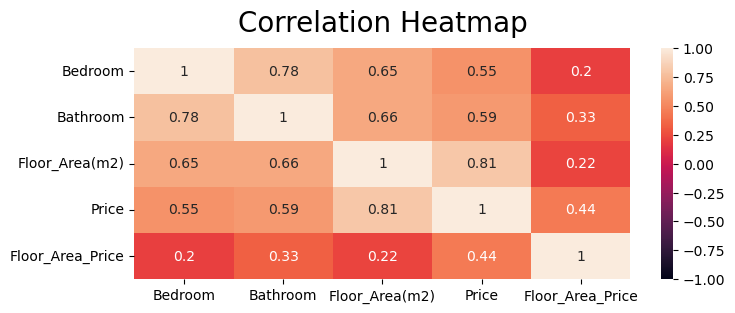

In [48]:
plt.figure(figsize=(8, 3))

heatmap = sns.heatmap(df2.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12);

plt.show()

**Categorical : Region, Bedroom, Bathroom, Floor Area(m2), Floor Area Price**
<br>
**Numerical : Price**

## Count of Houses Sale Each Region

In [49]:
region_count = df2['Region'].value_counts()
region_count

Bintaro           5470
BSD               3141
Gading Serpong    1303
Serpong           1291
Ciputat           1176
Pamulang          1106
Pondok Aren       1002
Ciputat Timur      871
Serpong Utara      564
Alam Sutera        500
Setu               115
Name: Region, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Region'>

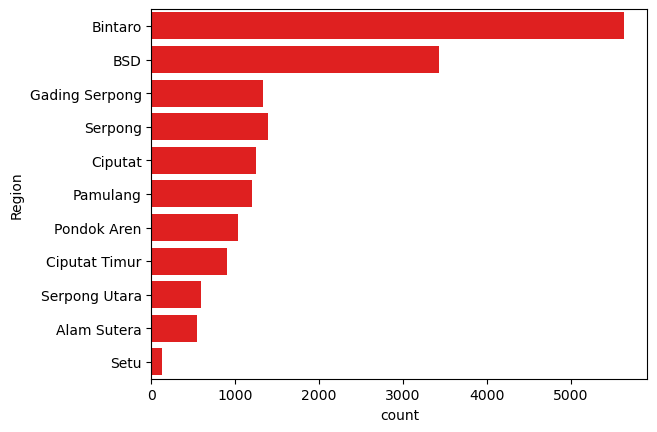

In [50]:
region_count = df2['Region'].value_counts().index
sns.countplot(data=df, y='Region', color='r', order=region_count)

In [51]:
# Bintaro is the region that sell the most houses

## Average Price of Each Region

In [52]:
region_price = df2.groupby('Region')['Price'].mean()
region_price = pd.DataFrame(region_price).reset_index()
column_name1 = ['Region', 'Price']
region_price.columns = column_name1
region_price = region_price.sort_values('Price', ascending=True)
region_price['Price'] = region_price['Price'].astype('int64')
region_price

,Region,Price
10,Setu,1149676631
6,Pamulang,1302061534
3,Ciputat,2118151430
8,Serpong,2431069458
9,Serpong Utara,2442298636
7,Pondok Aren,2590005652
4,Ciputat Timur,3118743518
5,Gading Serpong,3409839939
1,BSD,3718230368
2,Bintaro,3880568063


In [53]:
region_price['Price'] = region_price['Price'].astype('int64')

<Figure size 1000x500 with 0 Axes>

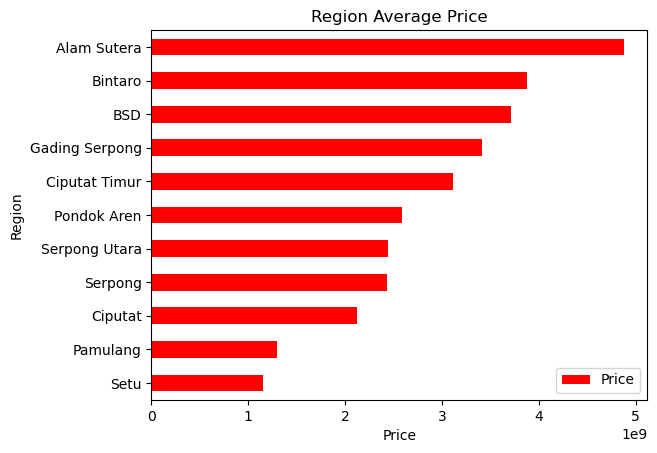

In [54]:
plt.figure(figsize=(10,5))

region_price.plot(kind='barh', x='Region', y='Price', color='r', title='Region Average Price')
plt.xlabel('Price')
plt.ylabel('Region')

plt.show()

In [55]:
# Alam Sutera is the region with most expensive average price
# Setu and Pamulang is the cheapest since it just a slight difference price

## Average Area Price Each Region

In [56]:
area_price = df2.groupby('Region')['Floor_Area_Price'].mean()
area_price = pd.DataFrame(area_price).reset_index()
column_name2 = ['Region', 'Floor_Area_Price']
area_price.columns = column_name2
area_price = area_price.sort_values('Floor_Area_Price', ascending=True)
area_price['Floor_Area_Price'] = area_price['Floor_Area_Price'].astype('int64')
area_price

,Region,Floor_Area_Price
6,Pamulang,11932109
10,Setu,12228107
3,Ciputat,14869539
4,Ciputat Timur,16604027
8,Serpong,16767595
7,Pondok Aren,17495770
9,Serpong Utara,17535506
2,Bintaro,20571711
1,BSD,20664767
5,Gading Serpong,23757960


<Figure size 1000x500 with 0 Axes>

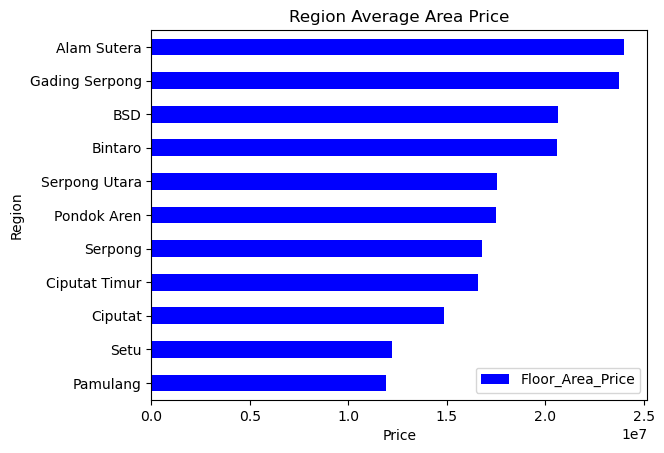

In [57]:
plt.figure(figsize=(10,5))

area_price.plot(kind='barh', x='Region', y='Floor_Area_Price', color='b', title='Region Average Area Price')
plt.xlabel('Price')
plt.ylabel('Region')

plt.show()

In [58]:
# Alam Sutera and Gading Serpong is the most expensive area price
# Pamulang and Setu is the cheapest area price

## Rooms Vs Price

In [59]:
bedroom = df2.groupby('Bedroom')['Price'].mean()
bedroom = pd.DataFrame(bedroom).reset_index()
column_name3 = ['Rooms', 'Bedroom Price']
bedroom.columns = column_name3
bedroom = bedroom.sort_values('Rooms', ascending=True)
bedroom['Bedroom Price'] = bedroom['Bedroom Price'].astype('int64')
bedroom

,Rooms,Bedroom Price
0,1.0,2184133160
1,2.0,1254437349
2,3.0,2037567060
3,4.0,3839991834
4,5.0,4968126387
5,6.0,6079385978
6,7.0,7102149457
7,8.0,8239282830
8,9.0,8172899999
9,10.0,5702072916


In [60]:
bathroom = df2.groupby('Bathroom')['Price'].mean()
bathroom = pd.DataFrame(bathroom).reset_index()
column_name4 = ['Rooms', 'Bathroom Price']
bathroom.columns = column_name4
bathroom = bathroom.sort_values('Rooms', ascending=True)
bathroom['Bathroom Price'] = bathroom['Bathroom Price'].astype('int64')
bathroom

,Rooms,Bathroom Price
0,1.0,1137885474
1,2.0,1740292027
2,3.0,3281203451
3,4.0,4626063736
4,5.0,6520363564
5,6.0,7501054595
6,7.0,8388065009
7,8.0,9144989166
8,9.0,7386409200
9,10.0,4789351851


In [61]:
rooms_merge = pd.merge(bedroom, bathroom, how='left', on='Rooms')
rooms_merge

,Rooms,Bedroom Price,Bathroom Price
0,1.0,2184133160,1137885474
1,2.0,1254437349,1740292027
2,3.0,2037567060,3281203451
3,4.0,3839991834,4626063736
4,5.0,4968126387,6520363564
5,6.0,6079385978,7501054595
6,7.0,7102149457,8388065009
7,8.0,8239282830,9144989166
8,9.0,8172899999,7386409200
9,10.0,5702072916,4789351851


<Figure size 1000x700 with 0 Axes>

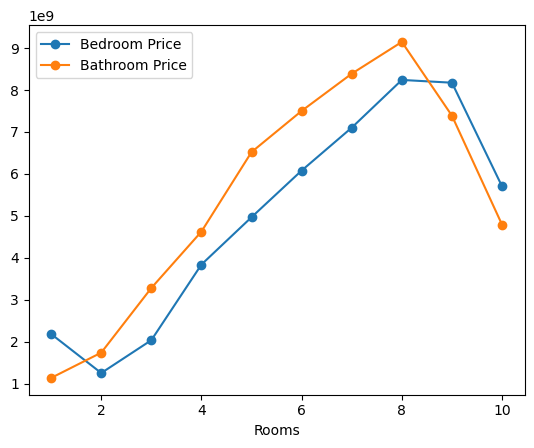

In [62]:
plt.figure(figsize=(10,7))
rooms_merge.plot(x='Rooms', y=['Bedroom Price', 'Bathroom Price'],
                 marker='o', linestyle='-')

plt.show()

In [63]:
## The more rooms the more expensive
## It's drop on 9-10 rooms probably cause of the outlier that we remove earlier

## Floor Area Vs Price

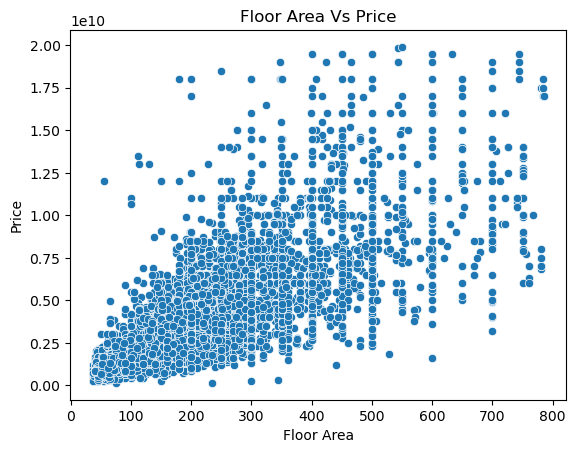

In [64]:
sns.scatterplot(data = df2, x='Floor_Area(m2)', y='Price')

plt.xlabel('Floor Area')
plt.ylabel('Price')
plt.title('Floor Area Vs Price')

plt.show()

In [65]:
# It's make a positive line with some spread

# Conclusion

1. Bintaro is region that sell most house
<br>
2. Alam Sutera is the most expensive region while Setu & Pamulang is the cheapest
<br>
3. Alam Sutera and Gading Serpong is the most expensive area price
<br>
4. Pamulang and Setu is the cheapest area price
<br>
5. The more rooms the more expensive
<br>
6. The more area the more expensive